In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import typing_extensions

In [9]:
import gradio as gr

[autoreload of fastapi.openapi failed: Traceback (most recent call last):
  File "/opt/conda/envs/content-moderation/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/envs/content-moderation/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/conda/envs/content-moderation/lib/python3.9/importlib/__init__.py", line 159, in reload
    raise ImportError(msg.format(parent_name),
ImportError: parent 'fastapi' not in sys.modules
]


ImportError: cannot import name 'Doc' from 'typing_extensions' (/home/aditya_rustagi_farmart_co/.local/lib/python3.9/site-packages/typing_extensions.py)

In [3]:
from transformers import CLIPModel, AutoProcessor
from PIL import Image
import torch
import os
import numpy
from on_field_gear_compliance_hackathon.constants import DATA_DIR, MODEL_DIR
from on_field_gear_compliance_hackathon.models import predict

import matplotlib.pyplot as plt
import gradio as gr

[autoreload of typing_extensions failed: Traceback (most recent call last):
  File "/opt/conda/envs/content-moderation/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/envs/content-moderation/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/conda/envs/content-moderation/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/home/aditya_rustagi_farmart_co/.local/lib/python3.9/site-packages/typing_extensions.py", line 733, in <module>
    class SupportsAbs(Protocol[T_co]):
  File "/opt/conda/envs/content-moderation/lib/python3.9/typing.py", line 274, in inner


initializing model


ImportError: cannot import name 'Doc' from 'typing_extensions' (/home/aditya_rustagi_farmart_co/.local/lib/python3.9/site-packages/typing_extensions.py)

In [28]:
# model_id = 'openai/clip-vit-base-patch32'
# device = "cuda" if torch.cuda.is_available() else "cpu"

# model = CLIPModel.from_pretrained(model_id).to(device)
# image_processor = AutoProcessor.from_pretrained(model_id)

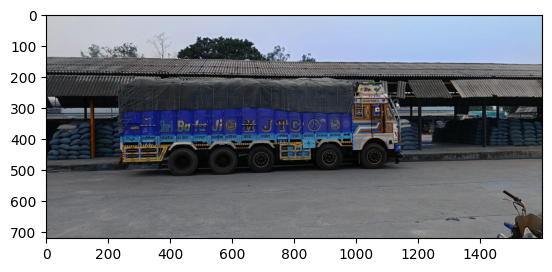

tensor([[0.2087, 0.7913]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person not wearing helmet
tensor([[0.4346, 0.4002, 0.1651]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with more than 1 person
-------------------


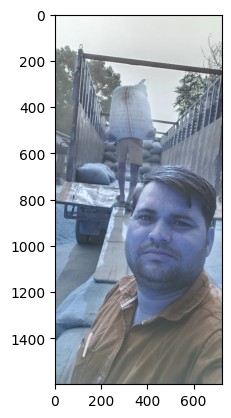

tensor([[0.1739, 0.8261]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person not wearing helmet
tensor([[0.1762, 0.5928, 0.2310]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with 1 person
-------------------


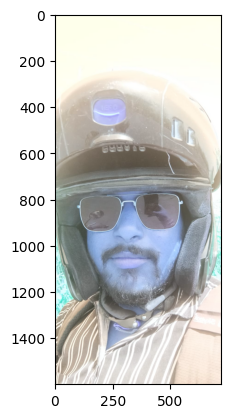

tensor([[0.5560, 0.4440]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person wearing helmet
tensor([[0.0891, 0.5049, 0.4060]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with 1 person
-------------------


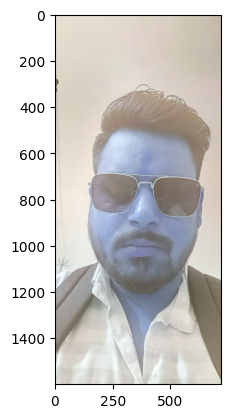

tensor([[0.1518, 0.8482]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person not wearing helmet
tensor([[0.0613, 0.3638, 0.5749]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with no person
-------------------


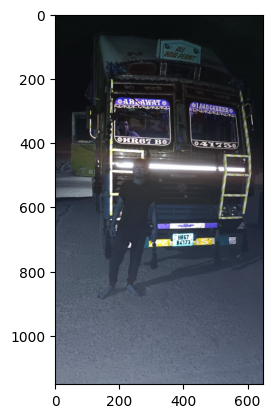

tensor([[0.1439, 0.8561]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person not wearing helmet
tensor([[0.1499, 0.4268, 0.4233]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with 1 person
-------------------


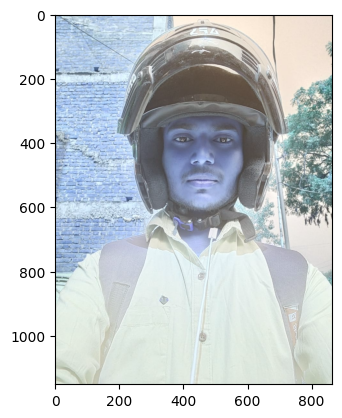

tensor([[0.5267, 0.4733]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person wearing helmet
tensor([[0.1647, 0.5697, 0.2655]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with 1 person
-------------------


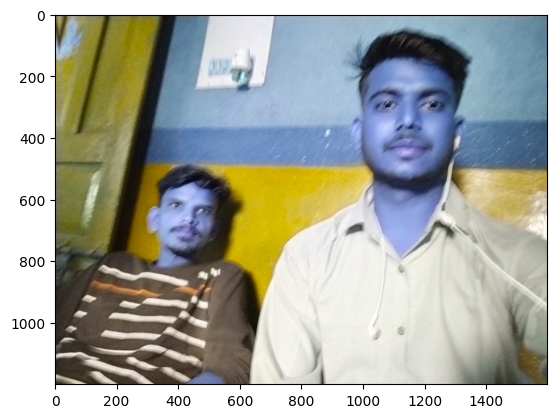

tensor([[0.0402, 0.9598]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person not wearing helmet
tensor([[0.3058, 0.6449, 0.0493]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with 1 person
-------------------


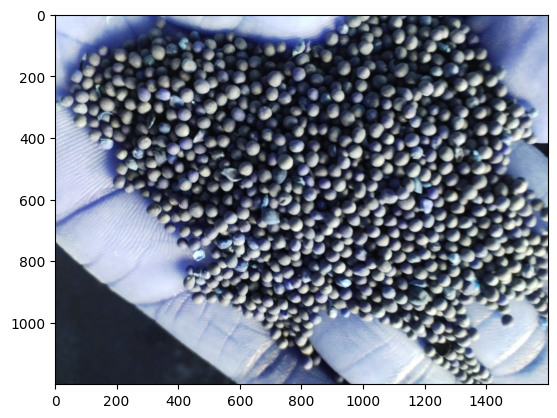

tensor([[0.2612, 0.7388]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person not wearing helmet
tensor([[0.6073, 0.2984, 0.0943]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with more than 1 person
-------------------


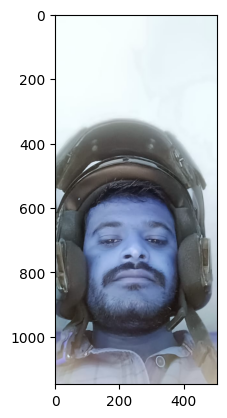

tensor([[0.4464, 0.5536]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person not wearing helmet
tensor([[0.1058, 0.7171, 0.1771]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with 1 person
-------------------


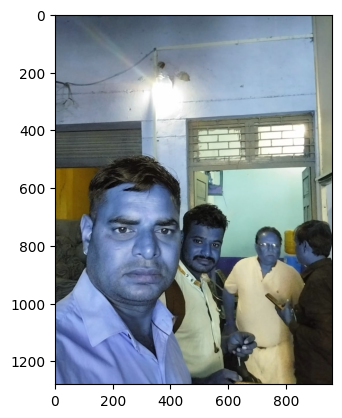

tensor([[0.0738, 0.9262]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person not wearing helmet
tensor([[0.4769, 0.4083, 0.1148]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with more than 1 person
-------------------


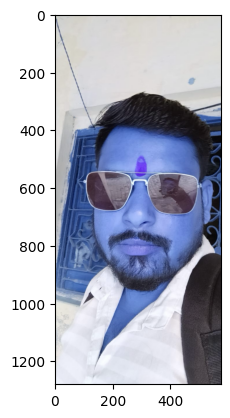

tensor([[0.2327, 0.7673]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person not wearing helmet
tensor([[0.1310, 0.5242, 0.3448]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with 1 person
-------------------


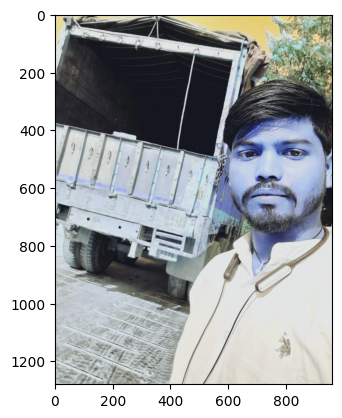

tensor([[0.2115, 0.7885]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person not wearing helmet
tensor([[0.2571, 0.3713, 0.3716]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with no person
-------------------


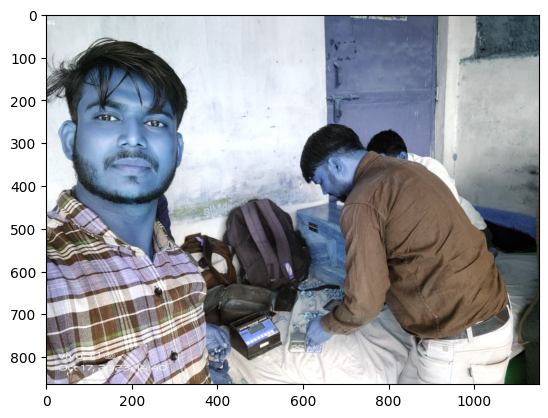

tensor([[0.0466, 0.9534]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person not wearing helmet
tensor([[0.3726, 0.5685, 0.0590]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with 1 person
-------------------


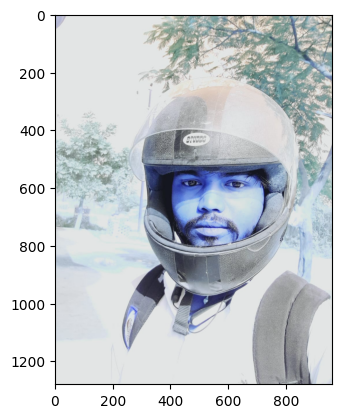

tensor([[0.6518, 0.3482]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Helmet : a person wearing helmet
tensor([[0.1283, 0.4711, 0.4006]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Count people : a photo with 1 person
-------------------


In [29]:
for images in os.listdir(os.path.join(DATA_DIR, 'selfies')) :
    img = Image.open(os.path.join(DATA_DIR, 'selfies', images))
    open_cv_image = numpy.array(img) 
    # Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy()
    plt.imshow(open_cv_image)
    plt.show()
    print(f'Helmet : {predict.contrastive_reply(img, "helmet")}')
    print(f'Count people : {predict.contrastive_reply(img, "count_people")}')
    print('-------------------')
    # img.show()


In [20]:
inputs = image_processor(
    text=["a person wearing helmet", "a person not wearing helmet"], images=image, return_tensors="pt", padding=True,
)

NameError: name 'image_processor' is not defined

{'input_ids': tensor([[49406,   320,  2533,  3309, 11122, 49407, 49407],
        [49406,   320,  2533,   783,  3309, 11122, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-9.3096e-01, -9.8935e-01, -1.0185e+00,  ...,  2.5152e-01,
            3.5371e-01,  4.2670e-01],
          [-9.4555e-01, -1.0185e+00, -1.0039e+00,  ...,  1.0553e-01,
            1.4933e-01,  1.7853e-01],
          [-1.0185e+00, -1.0039e+00, -8.8716e-01,  ...,  9.0935e-02,
            9.0935e-02,  9.0935e-02],
          ...,
          [ 1.8573e+00,  1.8865e+00,  1.9011e+00,  ..., -4.2001e-01,
           -3.0322e-01, -2.4483e-01],
          [ 1.8427e+00,  1.8281e+00,  1.8427e+00,  ..., -5.0760e-01,
           -5.0760e-01, -4.4921e-01],
          [ 1.8135e+00,  1.7990e+00,  1.7844e+00,  ..., -5.8059e-01,
           -6.2439e-01, -5.5140e-01]],

         [[-1.7628e-01, -2.3631e-01, -2.6633e-01,  ...,  5.7411e-01,
            6.3414e-01,  6.6415e-01],
  